In [48]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [49]:
data = pd.read_csv('datasets/Crop_Recommendation.csv')

In [50]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [51]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [52]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [53]:
data.shape

(2200, 8)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [55]:
data.duplicated().sum()

0

In [56]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

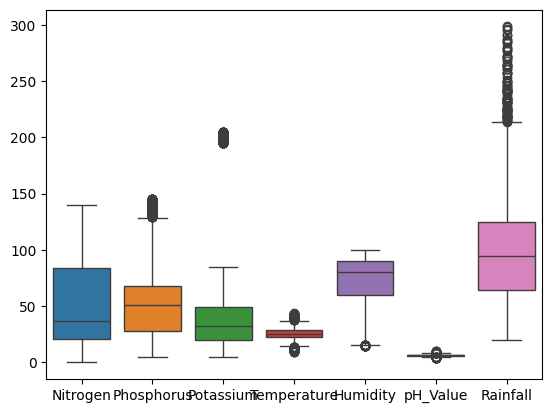

In [57]:
sns.boxplot(data=data)

In [58]:
x = data.drop('Crop', axis=1)
y = data['Crop']

In [59]:
y.value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [60]:
# allocate training split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [61]:
correct_sum = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

correct_sum

[432,
 427,
 430,
 429,
 430,
 430,
 432,
 431,
 431,
 430,
 431,
 430,
 431,
 432,
 433,
 430,
 432,
 430,
 431]

In [62]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [63]:
y_pred = knn.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred)

0.9840909090909091

In [65]:
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        21
   Blackgram       0.96      1.00      0.98        22
    ChickPea       1.00      1.00      1.00        25
     Coconut       1.00      1.00      1.00        24
      Coffee       1.00      1.00      1.00        23
      Cotton       1.00      1.00      1.00        26
      Grapes       1.00      1.00      1.00        20
        Jute       0.88      1.00      0.94        23
 KidneyBeans       0.91      1.00      0.95        20
      Lentil       0.95      1.00      0.98        21
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.95      0.97        19
    MungBean       1.00      1.00      1.00        13
   Muskmelon       1.00      1.00      1.00        15
      Orange       1.00      1.00      1.00        20
      Papaya       1.00    

In [68]:
knn.predict([[25,65,34,52.00445915,65.3207629,5.840207144,252.9642476]])

array(['Papaya'], dtype=object)